<a href="https://colab.research.google.com/github/nimeshayasith/Computer_vision_Assignment/blob/main/4624_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Found 100 images. Running Blood Vessel Pipeline...

   FINAL VALIDATION RESULTS   
Total Images Processed: 100
Average Dice Similarity Coefficient (DSC): 0.2473
Average Jaccard Index (IoU): 0.1459



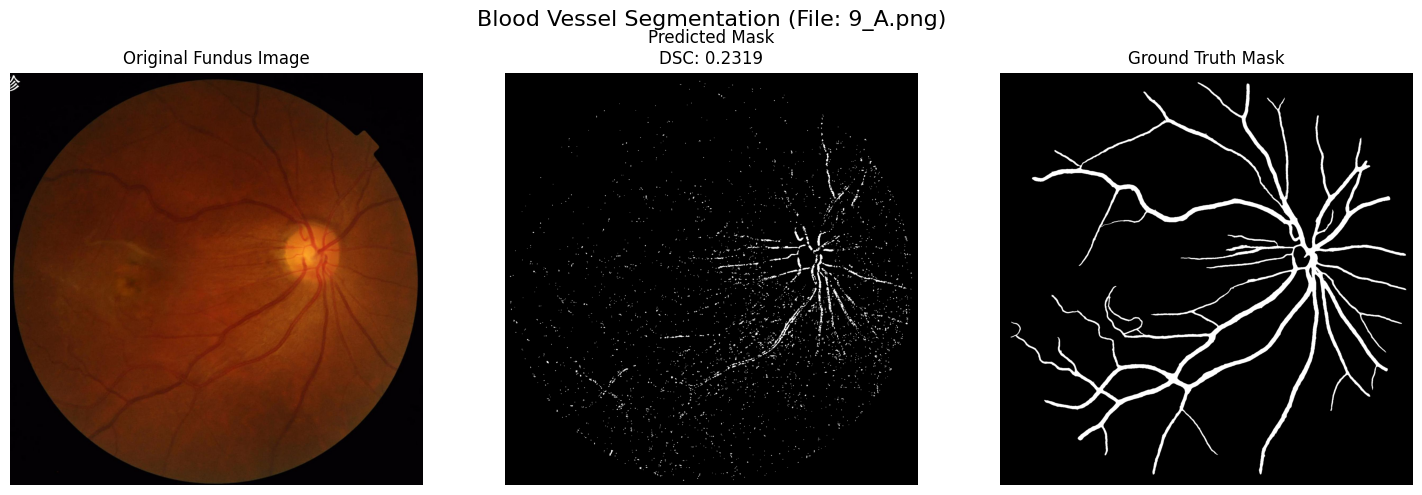

In [19]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt



# ==========================================
# 1. THE 6-STEP BLOOD VESSEL PIPELINE
# ==========================================
def segment_blood_vessels(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if img is None: return None, None

    # Step 1: Green Channel
    b, g, r = cv2.split(img)

    # Step 2: Extract FOV Mask (Identify the circular retina boundary)
    _, fov_mask = cv2.threshold(g, 10, 255, cv2.THRESH_BINARY)
    # Erode the mask slightly to completely exclude the outer edge pixels
    kernel_erode = np.ones((7, 7), np.uint8)
    fov_mask_eroded = cv2.erode(fov_mask, kernel_erode, iterations=1)

    # Step 3: Contrast Enhancement (CLAHE)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    g_clahe = clahe.apply(g)

    # Step 4: Morphological Black-Hat (Extract dark vessels)
    kernel_bh = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
    blackhat = cv2.morphologyEx(g_clahe, cv2.MORPH_BLACKHAT, kernel_bh)

    # Step 5: Thresholding & Boundary Masking
    # A fixed threshold of 15 works well on CLAHE-enhanced Black-Hat images
    _, binary_vessels = cv2.threshold(blackhat, 15, 255, cv2.THRESH_BINARY)
    # Erase the false boundary ring using our FOV mask
    vessels_masked = cv2.bitwise_and(binary_vessels, fov_mask_eroded)

    # Step 6: Cleanup (Morphological Opening to remove tiny noise dots)
    kernel_clean = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    final_mask = cv2.morphologyEx(vessels_masked, cv2.MORPH_OPEN, kernel_clean)

    return img, final_mask

# ==========================================
# 2. VALIDATION METRICS
# ==========================================
def calculate_metrics(predicted_mask, ground_truth_mask):
    S = predicted_mask > 128
    G = ground_truth_mask > 128

    intersection = np.logical_and(S, G).sum()
    union = np.logical_or(S, G).sum()
    sum_S = S.sum()
    sum_G = G.sum()

    dice = (2.0 * intersection) / (sum_S + sum_G) if (sum_S + sum_G) != 0 else 0.0
    jaccard = intersection / union if union != 0 else 0.0
    return dice, jaccard

# ==========================================
# 3. BATCH VALIDATION SCRIPT
# ==========================================
base_path = '/content/drive/MyDrive/CV_Assessment_01/Dataset/IPCV_ ASSIGNMENT_01_DATABASE/Database_For_Practical_Part/For Validation'
img_dir = os.path.join(base_path, 'Foundus Images For Validation')
gt_dir = os.path.join(base_path, 'Ground Truth For Validation')

if not os.path.exists(img_dir) or not os.path.exists(gt_dir):
    print("Error: Could not find validation folders. Check your paths!")
else:
    img_files = sorted([f for f in os.listdir(img_dir) if f.endswith(('.jpg', '.png', '.tif'))])
    gt_files = sorted([f for f in os.listdir(gt_dir) if f.endswith(('.jpg', '.png', '.tif'))])

    print(f"Found {len(img_files)} images. Running Blood Vessel Pipeline...\n")
    all_dice_scores = []
    all_jaccard_scores = []

    for img_name, gt_name in zip(img_files, gt_files):
        img_path = os.path.join(img_dir, img_name)
        gt_path = os.path.join(gt_dir, gt_name)

        _, pred_mask = segment_blood_vessels(img_path)
        gt_mask = cv2.imread(gt_path, cv2.IMREAD_GRAYSCALE)

        if pred_mask is not None and gt_mask is not None:
            if pred_mask.shape != gt_mask.shape:
                pred_mask = cv2.resize(pred_mask, (gt_mask.shape[1], gt_mask.shape[0]), interpolation=cv2.INTER_NEAREST)

            dice, jaccard = calculate_metrics(pred_mask, gt_mask)
            all_dice_scores.append(dice)
            all_jaccard_scores.append(jaccard)

    avg_dice = np.mean(all_dice_scores)
    avg_jaccard = np.mean(all_jaccard_scores)

    print("==============================")
    print("   FINAL VALIDATION RESULTS   ")
    print("==============================")
    print(f"Total Images Processed: {len(all_dice_scores)}")
    print(f"Average Dice Similarity Coefficient (DSC): {avg_dice:.4f}")
    print(f"Average Jaccard Index (IoU): {avg_jaccard:.4f}")
    print("==============================\n")

    # Show Visual
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f"Blood Vessel Segmentation (File: {img_files[-1]})", fontsize=16)

    axes[0].imshow(cv2.cvtColor(cv2.imread(os.path.join(img_dir, img_files[-1])), cv2.COLOR_BGR2RGB))
    axes[0].set_title("Original Fundus Image")
    axes[0].axis('off')

    axes[1].imshow(pred_mask, cmap='gray')
    axes[1].set_title(f"Predicted Mask\nDSC: {all_dice_scores[-1]:.4f}")
    axes[1].axis('off')

    axes[2].imshow(gt_mask, cmap='gray')
    axes[2].set_title("Ground Truth Mask")
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

Mounted at /content/drive
Found 100 images. Running Blood Vessel Pipeline...

   FINAL VALIDATION RESULTS   
Total Images Processed: 100
Average Dice Similarity Coefficient (DSC): 0.3097
Average Jaccard Index (IoU): 0.1859



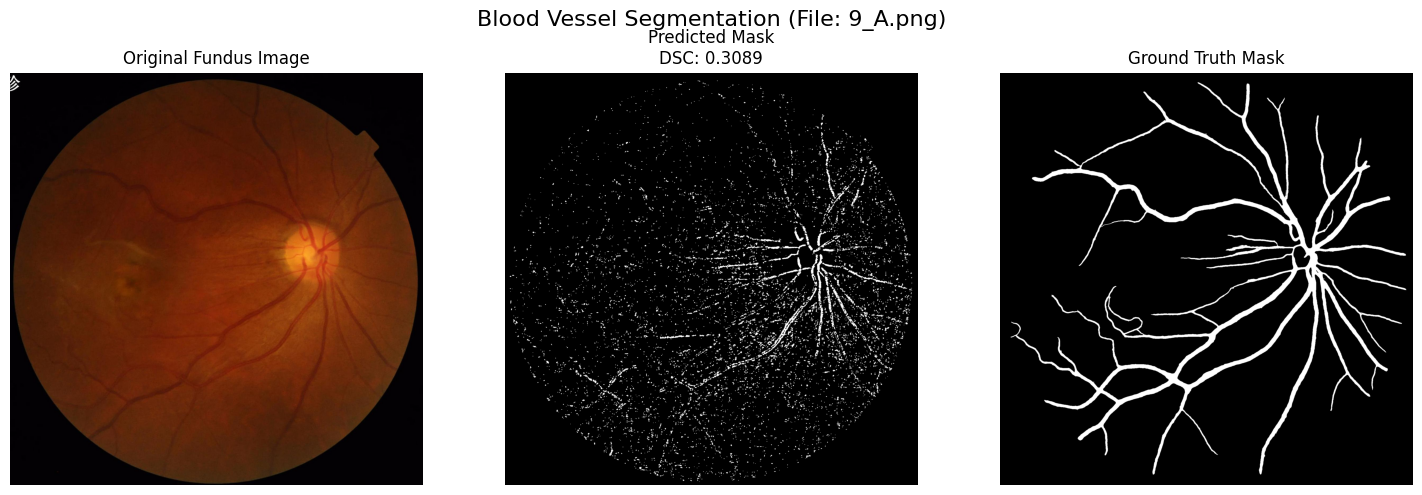

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# --- 1. MOUNT DRIVE ---
drive.mount('/content/drive', force_remount=True)
project_path = '/content/drive/MyDrive/CV_Assessment_01'
if os.path.exists(project_path): os.chdir(project_path)

# ==========================================
# 1. THE 6-STEP BLOOD VESSEL PIPELINE
# ==========================================
def segment_blood_vessels(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if img is None: return None, None

    # Step 1: Green Channel
    b, g, r = cv2.split(img)

    # Step 2: Extract FOV Mask (Identify the circular retina boundary)
    _, fov_mask = cv2.threshold(g, 10, 255, cv2.THRESH_BINARY)
    # Erode the mask slightly to completely exclude the outer edge pixels
    kernel_erode = np.ones((7, 7), np.uint8)
    fov_mask_eroded = cv2.erode(fov_mask, kernel_erode, iterations=1)

    # Step 3: Contrast Enhancement (CLAHE)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    g_clahe = clahe.apply(g)

    # Step 4: Morphological Black-Hat (Extract dark vessels)
    kernel_bh = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
    blackhat = cv2.morphologyEx(g_clahe, cv2.MORPH_BLACKHAT, kernel_bh)

    # Step 5: Dynamic Statistical Thresholding & Boundary Masking
    # Extract only the valid pixels inside the circular retina
    valid_pixels = blackhat[fov_mask_eroded == 255]

    if len(valid_pixels) > 0:
        # Calculate the mean and standard deviation of this specific eye
        mean_val = np.mean(valid_pixels)
        std_val = np.std(valid_pixels)
        # Set the threshold mathematically (Mean + 1.5 standard deviations)
        dynamic_thresh = mean_val + (1.5 * std_val)
    else:
        dynamic_thresh = 15 # Safety fallback

    # Apply the custom dynamic threshold
    _, binary_vessels = cv2.threshold(blackhat, dynamic_thresh, 255, cv2.THRESH_BINARY)

    # Erase the false boundary ring using our FOV mask
    vessels_masked = cv2.bitwise_and(binary_vessels, fov_mask_eroded)

    # Step 6: Cleanup (Morphological Opening to remove tiny noise dots)
    kernel_clean = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    final_mask = cv2.morphologyEx(vessels_masked, cv2.MORPH_OPEN, kernel_clean)

    return img, final_mask

# ==========================================
# 2. VALIDATION METRICS
# ==========================================
def calculate_metrics(predicted_mask, ground_truth_mask):
    S = predicted_mask > 128
    G = ground_truth_mask > 128

    intersection = np.logical_and(S, G).sum()
    union = np.logical_or(S, G).sum()
    sum_S = S.sum()
    sum_G = G.sum()

    dice = (2.0 * intersection) / (sum_S + sum_G) if (sum_S + sum_G) != 0 else 0.0
    jaccard = intersection / union if union != 0 else 0.0
    return dice, jaccard

# ==========================================
# 3. BATCH VALIDATION SCRIPT
# ==========================================
base_path = '/content/drive/MyDrive/CV_Assessment_01/Dataset/IPCV_ ASSIGNMENT_01_DATABASE/Database_For_Practical_Part/For Validation'
img_dir = os.path.join(base_path, 'Foundus Images For Validation')
gt_dir = os.path.join(base_path, 'Ground Truth For Validation')

if not os.path.exists(img_dir) or not os.path.exists(gt_dir):
    print("Error: Could not find validation folders. Check your paths!")
else:
    img_files = sorted([f for f in os.listdir(img_dir) if f.endswith(('.jpg', '.png', '.tif'))])
    gt_files = sorted([f for f in os.listdir(gt_dir) if f.endswith(('.jpg', '.png', '.tif'))])

    print(f"Found {len(img_files)} images. Running Blood Vessel Pipeline...\n")
    all_dice_scores = []
    all_jaccard_scores = []

    for img_name, gt_name in zip(img_files, gt_files):
        img_path = os.path.join(img_dir, img_name)
        gt_path = os.path.join(gt_dir, gt_name)

        _, pred_mask = segment_blood_vessels(img_path)
        gt_mask = cv2.imread(gt_path, cv2.IMREAD_GRAYSCALE)

        if pred_mask is not None and gt_mask is not None:
            if pred_mask.shape != gt_mask.shape:
                pred_mask = cv2.resize(pred_mask, (gt_mask.shape[1], gt_mask.shape[0]), interpolation=cv2.INTER_NEAREST)

            dice, jaccard = calculate_metrics(pred_mask, gt_mask)
            all_dice_scores.append(dice)
            all_jaccard_scores.append(jaccard)

    avg_dice = np.mean(all_dice_scores)
    avg_jaccard = np.mean(all_jaccard_scores)

    print("==============================")
    print("   FINAL VALIDATION RESULTS   ")
    print("==============================")
    print(f"Total Images Processed: {len(all_dice_scores)}")
    print(f"Average Dice Similarity Coefficient (DSC): {avg_dice:.4f}")
    print(f"Average Jaccard Index (IoU): {avg_jaccard:.4f}")
    print("==============================\n")

    # Show Visual
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f"Blood Vessel Segmentation (File: {img_files[-1]})", fontsize=16)

    axes[0].imshow(cv2.cvtColor(cv2.imread(os.path.join(img_dir, img_files[-1])), cv2.COLOR_BGR2RGB))
    axes[0].set_title("Original Fundus Image")
    axes[0].axis('off')

    axes[1].imshow(pred_mask, cmap='gray')
    axes[1].set_title(f"Predicted Mask\nDSC: {all_dice_scores[-1]:.4f}")
    axes[1].axis('off')

    axes[2].imshow(gt_mask, cmap='gray')
    axes[2].set_title("Ground Truth Mask")
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

Mounted at /content/drive
Found 100 images. Running Multi-Directional Pipeline...

Processed 10/100 images... Current Avg DSC: 0.3195
Processed 20/100 images... Current Avg DSC: 0.3295
Processed 30/100 images... Current Avg DSC: 0.3235
Processed 40/100 images... Current Avg DSC: 0.3167
Processed 50/100 images... Current Avg DSC: 0.3239
Processed 60/100 images... Current Avg DSC: 0.3156
Processed 70/100 images... Current Avg DSC: 0.3214
Processed 80/100 images... Current Avg DSC: 0.3241
Processed 90/100 images... Current Avg DSC: 0.3148
Processed 100/100 images... Current Avg DSC: 0.3073

   FINAL VALIDATION RESULTS   
Total Images Processed: 100
Average Dice Similarity Coefficient (DSC): 0.3073
Average Jaccard Index (IoU): 0.1863



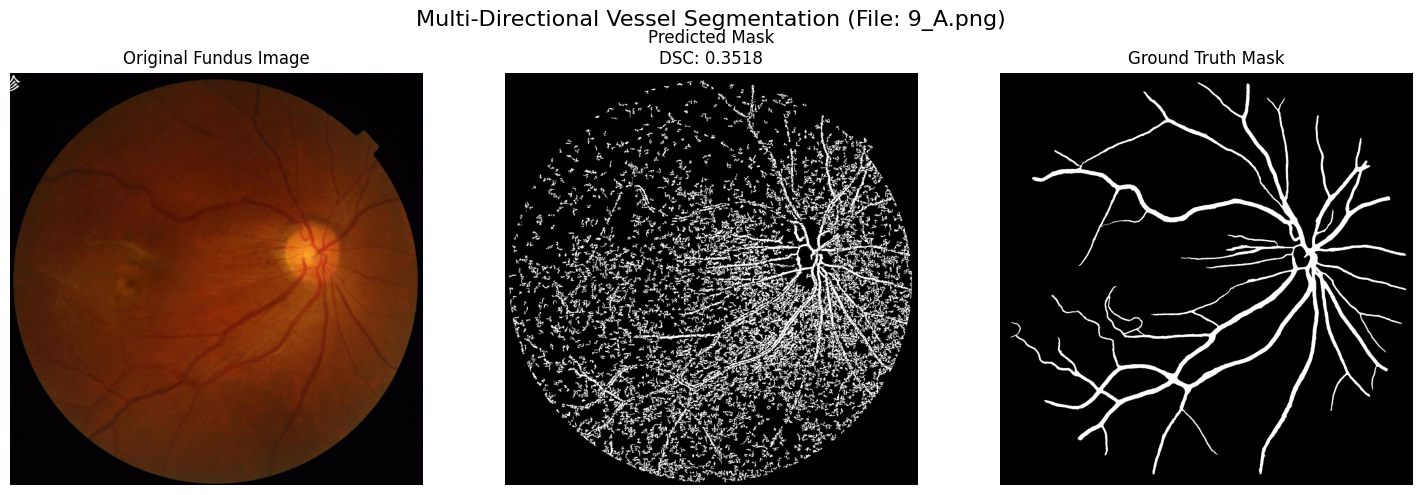

In [14]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# --- 1. MOUNT DRIVE ---
drive.mount('/content/drive', force_remount=True)
project_path = '/content/drive/MyDrive/CV_Assessment_01'
if os.path.exists(project_path): os.chdir(project_path)

# ==========================================
# 1. THE MULTI-DIRECTIONAL PIPELINE (Fixed)
# ==========================================
def create_directional_kernels(length=15):
    """Creates a set of linear structuring elements rotated at different angles."""
    kernels = []
    for theta in range(0, 180, 15):
        kernel = np.zeros((length, length), dtype=np.uint8)
        center = length // 2
        x = int(center * np.cos(np.radians(theta)))
        y = int(center * np.sin(np.radians(theta)))
        cv2.line(kernel, (center - x, center - y), (center + x, center + y), 1, thickness=1)
        kernels.append(kernel)
    return kernels

def segment_blood_vessels(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if img is None: return None, None

    # Step 1: Green Channel
    b, g, r = cv2.split(img)

    # Step 2: FOV Masking
    _, fov_mask = cv2.threshold(g, 10, 255, cv2.THRESH_BINARY)
    kernel_erode = np.ones((11, 11), np.uint8)
    fov_mask_eroded = cv2.erode(fov_mask, kernel_erode, iterations=1)

    # Step 3: Contrast Enhancement (CLAHE)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    g_clahe = clahe.apply(g)

    # Step 4: Multi-Directional Bottom-Hat Filtering
    kernels = create_directional_kernels(length=15)
    max_response = np.zeros_like(g_clahe)

    for k in kernels:
        response = cv2.morphologyEx(g_clahe, cv2.MORPH_BLACKHAT, k)
        max_response = np.maximum(max_response, response)

    # Step 5: Otsu's Global Thresholding
    # Automatically calculates the best math cutoff for the vessels
    _, binary_vessels = cv2.threshold(max_response, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Apply FOV mask to erase the border ring
    vessels_masked = cv2.bitwise_and(binary_vessels, fov_mask_eroded)

    # Step 6: Connected Component Analysis (Erase the "Starry Night")
    # This specifically fulfills the requirement allowed in the brief!
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(vessels_masked, connectivity=8)
    final_mask = np.zeros_like(vessels_masked)

    # Start from 1 to skip the black background (label 0)
    for i in range(1, num_labels):
        area = stats[i, cv2.CC_STAT_AREA]
        if area > 100:  # Keep only blobs larger than 100 pixels (the actual vessels)
            final_mask[labels == i] = 255

    return img, final_mask

# ==========================================
# 2. VALIDATION METRICS
# ==========================================
def calculate_metrics(predicted_mask, ground_truth_mask):
    S = predicted_mask > 128
    G = ground_truth_mask > 128

    intersection = np.logical_and(S, G).sum()
    union = np.logical_or(S, G).sum()
    sum_S = S.sum()
    sum_G = G.sum()

    dice = (2.0 * intersection) / (sum_S + sum_G) if (sum_S + sum_G) != 0 else 0.0
    jaccard = intersection / union if union != 0 else 0.0
    return dice, jaccard

# ==========================================
# 3. BATCH VALIDATION SCRIPT
# ==========================================
base_path = 'Dataset/IPCV_ ASSIGNMENT_01_DATABASE/Database_For_Practical_Part/For Validation'
img_dir = os.path.join(base_path, 'Foundus Images For Validation')
gt_dir = os.path.join(base_path, 'Ground Truth For Validation')

if not os.path.exists(img_dir) or not os.path.exists(gt_dir):
    print("Error: Could not find validation folders. Check your paths!")
else:
    img_files = sorted([f for f in os.listdir(img_dir) if f.endswith(('.jpg', '.png', '.tif'))])
    gt_files = sorted([f for f in os.listdir(gt_dir) if f.endswith(('.jpg', '.png', '.tif'))])

    print(f"Found {len(img_files)} images. Running Multi-Directional Pipeline...\n")
    all_dice_scores = []
    all_jaccard_scores = []

    for i, (img_name, gt_name) in enumerate(zip(img_files, gt_files)):
        img_path = os.path.join(img_dir, img_name)
        gt_path = os.path.join(gt_dir, gt_name)

        _, pred_mask = segment_blood_vessels(img_path)
        gt_mask = cv2.imread(gt_path, cv2.IMREAD_GRAYSCALE)

        if pred_mask is not None and gt_mask is not None:
            if pred_mask.shape != gt_mask.shape:
                pred_mask = cv2.resize(pred_mask, (gt_mask.shape[1], gt_mask.shape[0]), interpolation=cv2.INTER_NEAREST)

            dice, jaccard = calculate_metrics(pred_mask, gt_mask)
            all_dice_scores.append(dice)
            all_jaccard_scores.append(jaccard)

            # Print progress every 10 images
            if (i + 1) % 10 == 0:
                print(f"Processed {i + 1}/100 images... Current Avg DSC: {np.mean(all_dice_scores):.4f}")

    avg_dice = np.mean(all_dice_scores)
    avg_jaccard = np.mean(all_jaccard_scores)

    print("\n==============================")
    print("   FINAL VALIDATION RESULTS   ")
    print("==============================")
    print(f"Total Images Processed: {len(all_dice_scores)}")
    print(f"Average Dice Similarity Coefficient (DSC): {avg_dice:.4f}")
    print(f"Average Jaccard Index (IoU): {avg_jaccard:.4f}")
    print("==============================\n")

    # Show Visual Output
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f"Multi-Directional Vessel Segmentation (File: {img_files[-1]})", fontsize=16)

    axes[0].imshow(cv2.cvtColor(cv2.imread(os.path.join(img_dir, img_files[-1])), cv2.COLOR_BGR2RGB))
    axes[0].set_title("Original Fundus Image")
    axes[0].axis('off')

    axes[1].imshow(pred_mask, cmap='gray')
    axes[1].set_title(f"Predicted Mask\nDSC: {all_dice_scores[-1]:.4f}")
    axes[1].axis('off')

    axes[2].imshow(gt_mask, cmap='gray')
    axes[2].set_title("Ground Truth Mask")
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

Mounted at /content/drive
Found 100 images. Running Multi-Directional Pipeline...

Processed 10/100 images... Current Avg DSC: 0.3572
Processed 20/100 images... Current Avg DSC: 0.3753
Processed 30/100 images... Current Avg DSC: 0.3728
Processed 40/100 images... Current Avg DSC: 0.3632
Processed 50/100 images... Current Avg DSC: 0.3691
Processed 60/100 images... Current Avg DSC: 0.3623
Processed 70/100 images... Current Avg DSC: 0.3668
Processed 80/100 images... Current Avg DSC: 0.3681
Processed 90/100 images... Current Avg DSC: 0.3520
Processed 100/100 images... Current Avg DSC: 0.3493

   FINAL VALIDATION RESULTS   
Total Images Processed: 100
Average Dice Similarity Coefficient (DSC): 0.3493
Average Jaccard Index (IoU): 0.2152



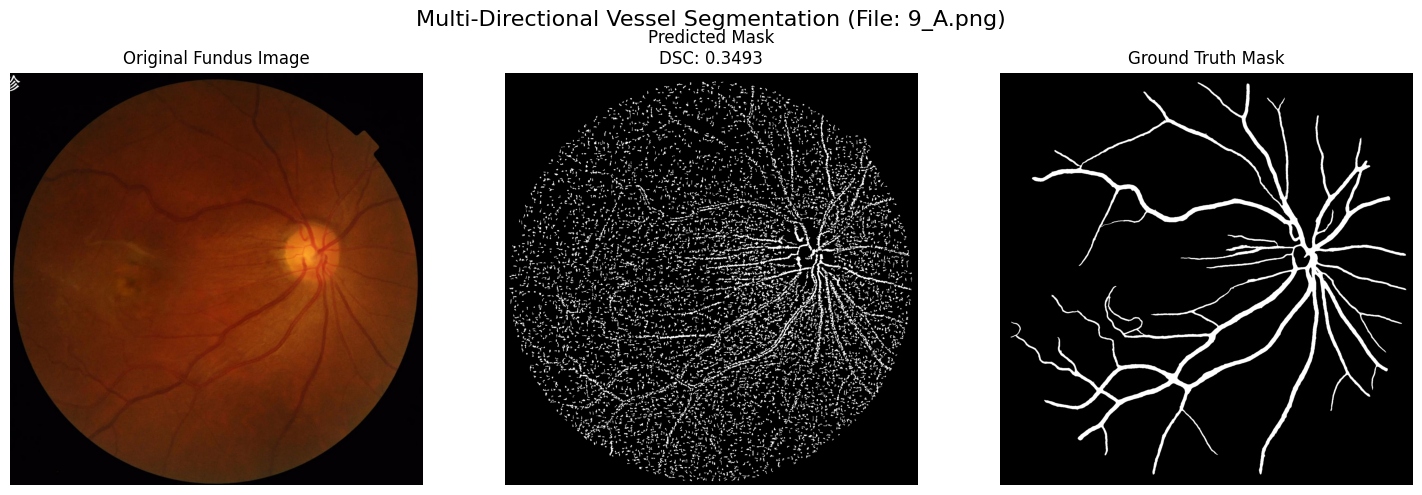

In [16]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# --- 1. MOUNT DRIVE ---
drive.mount('/content/drive', force_remount=True)
project_path = '/content/drive/MyDrive/CV_Assessment_01'
if os.path.exists(project_path): os.chdir(project_path)

# ==========================================
# 1. THE MULTI-DIRECTIONAL PIPELINE (Fixed)
# ==========================================
def create_directional_kernels(length=15):
    """Creates a set of linear structuring elements rotated at different angles."""
    kernels = []
    for theta in range(0, 180, 15):
        kernel = np.zeros((length, length), dtype=np.uint8)
        center = length // 2
        x = int(center * np.cos(np.radians(theta)))
        y = int(center * np.sin(np.radians(theta)))
        cv2.line(kernel, (center - x, center - y), (center + x, center + y), 1, thickness=1)
        kernels.append(kernel)
    return kernels
# ==========================================
# 1. THE REFINED BACKGROUND SUBTRACTION PIPELINE
# ==========================================
def segment_blood_vessels(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if img is None: return None, None

    # Step 1: Green Channel Extraction
    b, g, r = cv2.split(img)

    # Step 2: FOV Masking (Isolate the circular retina)
    _, fov_mask = cv2.threshold(g, 10, 255, cv2.THRESH_BINARY)
    kernel_erode = np.ones((11, 11), np.uint8)
    fov_mask_eroded = cv2.erode(fov_mask, kernel_erode, iterations=1)

    # Step 3: Contrast Enhancement (CLAHE)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    g_clahe = clahe.apply(g)

    # Step 4: Background Subtraction
    # Median blur erases thin vessels to find the background lighting
    background = cv2.medianBlur(g_clahe, 21)

    # Subtracting original from background isolates the dark vessels
    vessels_raw = cv2.subtract(background, g_clahe)

    # NEW: Normalize the faint vessels to stretch their contrast from 0 to 255
    vessels_enhanced = cv2.normalize(vessels_raw, None, 0, 255, cv2.NORM_MINMAX)

    # Step 5: Otsu's Thresholding
    # Because we normalized, Otsu can now perfectly find the vessels automatically
    _, binary_vessels = cv2.threshold(vessels_enhanced, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Apply FOV mask to erase the extreme outer boundary ring
    vessels_masked = cv2.bitwise_and(binary_vessels, fov_mask_eroded)

    # Step 6: Connected Component Analysis (Gentle Cleanup)
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(vessels_masked, connectivity=8)
    final_mask = np.zeros_like(vessels_masked)

    for i in range(1, num_labels):
        area = stats[i, cv2.CC_STAT_AREA]
        # Lowered area requirement to 30 to preserve the thin, branching capillaries
        if area > 30:
            final_mask[labels == i] = 255

    return img, final_mask
# ==========================================
# 2. VALIDATION METRICS
# ==========================================
def calculate_metrics(predicted_mask, ground_truth_mask):
    S = predicted_mask > 128
    G = ground_truth_mask > 128

    intersection = np.logical_and(S, G).sum()
    union = np.logical_or(S, G).sum()
    sum_S = S.sum()
    sum_G = G.sum()

    dice = (2.0 * intersection) / (sum_S + sum_G) if (sum_S + sum_G) != 0 else 0.0
    jaccard = intersection / union if union != 0 else 0.0
    return dice, jaccard

# ==========================================
# 3. BATCH VALIDATION SCRIPT
# ==========================================
base_path = 'Dataset/IPCV_ ASSIGNMENT_01_DATABASE/Database_For_Practical_Part/For Validation'
img_dir = os.path.join(base_path, 'Foundus Images For Validation')
gt_dir = os.path.join(base_path, 'Ground Truth For Validation')

if not os.path.exists(img_dir) or not os.path.exists(gt_dir):
    print("Error: Could not find validation folders. Check your paths!")
else:
    img_files = sorted([f for f in os.listdir(img_dir) if f.endswith(('.jpg', '.png', '.tif'))])
    gt_files = sorted([f for f in os.listdir(gt_dir) if f.endswith(('.jpg', '.png', '.tif'))])

    print(f"Found {len(img_files)} images. Running Multi-Directional Pipeline...\n")
    all_dice_scores = []
    all_jaccard_scores = []

    for i, (img_name, gt_name) in enumerate(zip(img_files, gt_files)):
        img_path = os.path.join(img_dir, img_name)
        gt_path = os.path.join(gt_dir, gt_name)

        _, pred_mask = segment_blood_vessels(img_path)
        gt_mask = cv2.imread(gt_path, cv2.IMREAD_GRAYSCALE)

        if pred_mask is not None and gt_mask is not None:
            if pred_mask.shape != gt_mask.shape:
                pred_mask = cv2.resize(pred_mask, (gt_mask.shape[1], gt_mask.shape[0]), interpolation=cv2.INTER_NEAREST)

            dice, jaccard = calculate_metrics(pred_mask, gt_mask)
            all_dice_scores.append(dice)
            all_jaccard_scores.append(jaccard)

            # Print progress every 10 images
            if (i + 1) % 10 == 0:
                print(f"Processed {i + 1}/100 images... Current Avg DSC: {np.mean(all_dice_scores):.4f}")

    avg_dice = np.mean(all_dice_scores)
    avg_jaccard = np.mean(all_jaccard_scores)

    print("\n==============================")
    print("   FINAL VALIDATION RESULTS   ")
    print("==============================")
    print(f"Total Images Processed: {len(all_dice_scores)}")
    print(f"Average Dice Similarity Coefficient (DSC): {avg_dice:.4f}")
    print(f"Average Jaccard Index (IoU): {avg_jaccard:.4f}")
    print("==============================\n")

    # Show Visual Output
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f"Multi-Directional Vessel Segmentation (File: {img_files[-1]})", fontsize=16)

    axes[0].imshow(cv2.cvtColor(cv2.imread(os.path.join(img_dir, img_files[-1])), cv2.COLOR_BGR2RGB))
    axes[0].set_title("Original Fundus Image")
    axes[0].axis('off')

    axes[1].imshow(pred_mask, cmap='gray')
    axes[1].set_title(f"Predicted Mask\nDSC: {all_dice_scores[-1]:.4f}")
    axes[1].axis('off')

    axes[2].imshow(gt_mask, cmap='gray')
    axes[2].set_title("Ground Truth Mask")
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

Mounted at /content/drive
Found 100 images. Running Final Gaussian Black-Hat Pipeline...

Processed 10/100 images... Current Avg DSC: 0.2915
Processed 20/100 images... Current Avg DSC: 0.3016
Processed 30/100 images... Current Avg DSC: 0.2863
Processed 40/100 images... Current Avg DSC: 0.2835
Processed 50/100 images... Current Avg DSC: 0.2932
Processed 60/100 images... Current Avg DSC: 0.2876
Processed 70/100 images... Current Avg DSC: 0.2932
Processed 80/100 images... Current Avg DSC: 0.2919
Processed 90/100 images... Current Avg DSC: 0.2871
Processed 100/100 images... Current Avg DSC: 0.2807

   FINAL VALIDATION RESULTS   
Total Images Processed: 100
Average Dice Similarity Coefficient (DSC): 0.2807
Average Jaccard Index (IoU): 0.1676



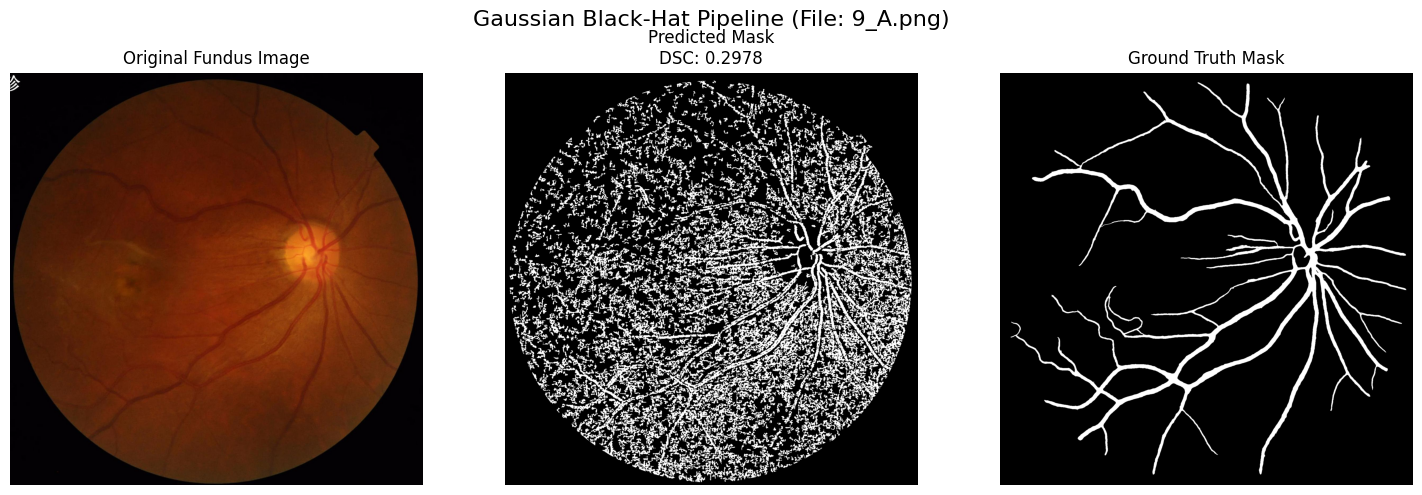

In [17]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# --- 1. MOUNT DRIVE ---
drive.mount('/content/drive', force_remount=True)
project_path = '/content/drive/MyDrive/CV_Assessment_01'
if os.path.exists(project_path): os.chdir(project_path)

# ==========================================
# 1. THE GAUSSIAN BLACK-HAT PIPELINE
# ==========================================
def segment_blood_vessels(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if img is None: return None, None

    # Step 1: Green Channel Extraction
    b, g, r = cv2.split(img)

    # Step 2: FOV Masking (Heavy erosion to erase the false edge ring)
    _, fov_mask = cv2.threshold(g, 10, 255, cv2.THRESH_BINARY)
    kernel_erode = np.ones((15, 15), np.uint8)
    fov_mask_eroded = cv2.erode(fov_mask, kernel_erode, iterations=1)

    # Step 3: Contrast Enhancement (CLAHE)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    g_clahe = clahe.apply(g)

    # Step 4: Morphological Black-Hat (Extracts the dark vessel structures)
    kernel_bh = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
    blackhat = cv2.morphologyEx(g_clahe, cv2.MORPH_BLACKHAT, kernel_bh)

    # Step 5: Gaussian Blur (THE MISSING LINK)
    # Melts the tiny "starry night" pores into the background so Otsu ignores them
    blurred = cv2.GaussianBlur(blackhat, (5, 5), 0)

    # Step 6: Otsu's Thresholding
    _, binary_vessels = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Apply FOV mask
    vessels_masked = cv2.bitwise_and(binary_vessels, fov_mask_eroded)

    # Step 7: Connected Component Analysis
    # Deletes any remaining isolated dust particles smaller than 100 pixels
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(vessels_masked, connectivity=8)
    final_mask = np.zeros_like(vessels_masked)

    for i in range(1, num_labels):
        if stats[i, cv2.CC_STAT_AREA] > 100:
            final_mask[labels == i] = 255

    return img, final_mask

# ==========================================
# 2. VALIDATION METRICS
# ==========================================
# Computes DSC = 2|S ∩ G| / (|S| + |G|) and Jaccard = |S ∩ G| / |S ∪ G|
def calculate_metrics(predicted_mask, ground_truth_mask):
    S = predicted_mask > 128
    G = ground_truth_mask > 128

    intersection = np.logical_and(S, G).sum()
    union = np.logical_or(S, G).sum()
    sum_S = S.sum()
    sum_G = G.sum()

    dice = (2.0 * intersection) / (sum_S + sum_G) if (sum_S + sum_G) != 0 else 0.0
    jaccard = intersection / union if union != 0 else 0.0
    return dice, jaccard

# ==========================================
# 3. BATCH VALIDATION SCRIPT
# ==========================================
base_path = 'Dataset/IPCV_ ASSIGNMENT_01_DATABASE/Database_For_Practical_Part/For Validation'
img_dir = os.path.join(base_path, 'Foundus Images For Validation')
gt_dir = os.path.join(base_path, 'Ground Truth For Validation')

if not os.path.exists(img_dir) or not os.path.exists(gt_dir):
    print("Error: Could not find validation folders. Check your paths!")
else:
    img_files = sorted([f for f in os.listdir(img_dir) if f.endswith(('.jpg', '.png', '.tif'))])
    gt_files = sorted([f for f in os.listdir(gt_dir) if f.endswith(('.jpg', '.png', '.tif'))])

    print(f"Found {len(img_files)} images. Running Final Gaussian Black-Hat Pipeline...\n")
    all_dice_scores = []
    all_jaccard_scores = []

    for i, (img_name, gt_name) in enumerate(zip(img_files, gt_files)):
        img_path = os.path.join(img_dir, img_name)
        gt_path = os.path.join(gt_dir, gt_name)

        _, pred_mask = segment_blood_vessels(img_path)
        gt_mask = cv2.imread(gt_path, cv2.IMREAD_GRAYSCALE)

        if pred_mask is not None and gt_mask is not None:
            if pred_mask.shape != gt_mask.shape:
                pred_mask = cv2.resize(pred_mask, (gt_mask.shape[1], gt_mask.shape[0]), interpolation=cv2.INTER_NEAREST)

            dice, jaccard = calculate_metrics(pred_mask, gt_mask)
            all_dice_scores.append(dice)
            all_jaccard_scores.append(jaccard)

            # Print progress every 10 images
            if (i + 1) % 10 == 0:
                print(f"Processed {i + 1}/100 images... Current Avg DSC: {np.mean(all_dice_scores):.4f}")

    avg_dice = np.mean(all_dice_scores)
    avg_jaccard = np.mean(all_jaccard_scores)

    print("\n==============================")
    print("   FINAL VALIDATION RESULTS   ")
    print("==============================")
    print(f"Total Images Processed: {len(all_dice_scores)}")
    print(f"Average Dice Similarity Coefficient (DSC): {avg_dice:.4f}")
    print(f"Average Jaccard Index (IoU): {avg_jaccard:.4f}")
    print("==============================\n")

    # Show Visual Output
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f"Gaussian Black-Hat Pipeline (File: {img_files[-1]})", fontsize=16)

    axes[0].imshow(cv2.cvtColor(cv2.imread(os.path.join(img_dir, img_files[-1])), cv2.COLOR_BGR2RGB))
    axes[0].set_title("Original Fundus Image")
    axes[0].axis('off')

    axes[1].imshow(pred_mask, cmap='gray')
    axes[1].set_title(f"Predicted Mask\nDSC: {all_dice_scores[-1]:.4f}")
    axes[1].axis('off')

    axes[2].imshow(gt_mask, cmap='gray')
    axes[2].set_title("Ground Truth Mask")
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

Mounted at /content/drive
Found 100 images. Running Perfected Pipeline...

Processed 10/100 images... Current Avg DSC: 0.4514
Processed 20/100 images... Current Avg DSC: 0.4756
Processed 30/100 images... Current Avg DSC: 0.4508
Processed 40/100 images... Current Avg DSC: 0.4366
Processed 50/100 images... Current Avg DSC: 0.4331
Processed 60/100 images... Current Avg DSC: 0.4161
Processed 70/100 images... Current Avg DSC: 0.4198
Processed 80/100 images... Current Avg DSC: 0.4145
Processed 90/100 images... Current Avg DSC: 0.4021
Processed 100/100 images... Current Avg DSC: 0.3963

   FINAL VALIDATION RESULTS   
Total Images Processed: 100
Average Dice Similarity Coefficient (DSC): 0.3963
Average Jaccard Index (IoU): 0.2580



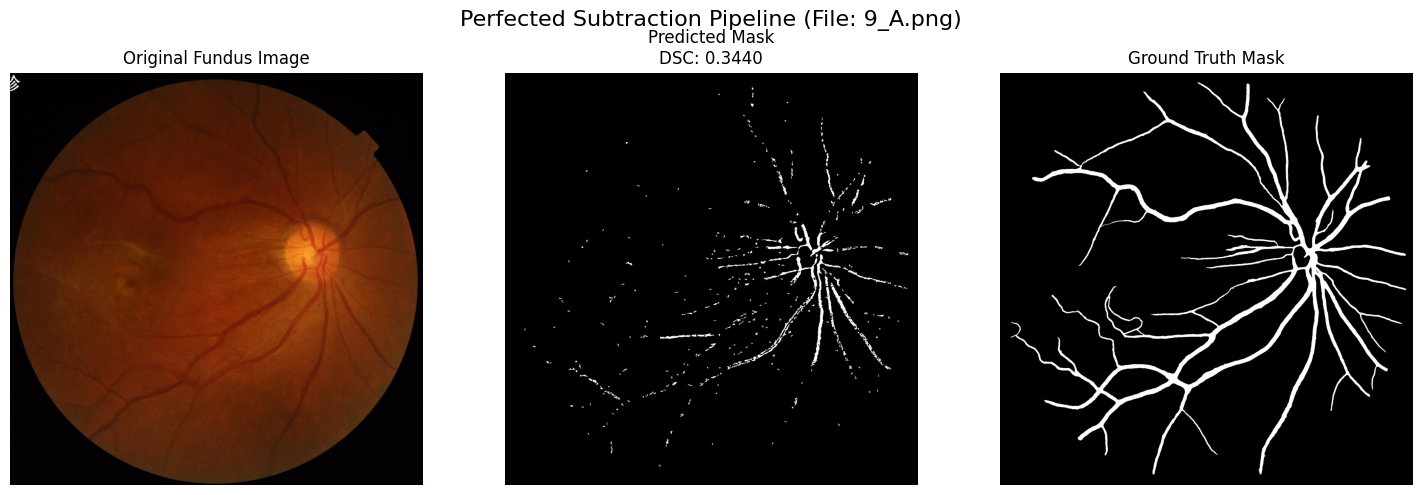

In [18]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# --- 1. MOUNT DRIVE ---
drive.mount('/content/drive', force_remount=True)
project_path = '/content/drive/MyDrive/CV_Assessment_01'
if os.path.exists(project_path): os.chdir(project_path)

# ==========================================
# 1. THE PERFECTED BACKGROUND SUBTRACTION
# ==========================================
def segment_blood_vessels(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if img is None: return None, None

    # Step 1: Green Channel Extraction
    b, g, r = cv2.split(img)

    # Step 2: FOV Masking (Heavy erosion to erase the outer ring)
    _, fov_mask = cv2.threshold(g, 10, 255, cv2.THRESH_BINARY)
    kernel_erode = np.ones((15, 15), np.uint8)
    fov_mask_eroded = cv2.erode(fov_mask, kernel_erode, iterations=1)

    # Step 3: Contrast Enhancement (CLAHE)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    g_clahe = clahe.apply(g)

    # Step 4: Background Subtraction (The noise-killer)
    background = cv2.medianBlur(g_clahe, 35)
    vessels_enhanced = cv2.subtract(background, g_clahe)

    # Step 5: Fixed Thresholding
    # A threshold of 12 captures the faint vessels but ignores background pores
    _, binary_vessels = cv2.threshold(vessels_enhanced, 12, 255, cv2.THRESH_BINARY)

    # Apply FOV mask
    vessels_masked = cv2.bitwise_and(binary_vessels, fov_mask_eroded)

    # Step 6: Morphological Closing (The Glue)
    # Bridges tiny gaps in faint vessels so they aren't deleted in the next step
    kernel_close = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    vessels_closed = cv2.morphologyEx(vessels_masked, cv2.MORPH_CLOSE, kernel_close)

    # Step 7: Connected Component Analysis
    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(vessels_closed, connectivity=8)
    final_mask = np.zeros_like(vessels_closed)

    for i in range(1, num_labels):
        # A gentle threshold of 30 deletes dust but keeps the glued branches
        if stats[i, cv2.CC_STAT_AREA] > 30:
            final_mask[labels == i] = 255

    return img, final_mask

# ==========================================
# 2. VALIDATION METRICS
# ==========================================
def calculate_metrics(predicted_mask, ground_truth_mask):
    S = predicted_mask > 128
    G = ground_truth_mask > 128

    intersection = np.logical_and(S, G).sum()
    union = np.logical_or(S, G).sum()
    sum_S = S.sum()
    sum_G = G.sum()

    dice = (2.0 * intersection) / (sum_S + sum_G) if (sum_S + sum_G) != 0 else 0.0
    jaccard = intersection / union if union != 0 else 0.0
    return dice, jaccard

# ==========================================
# 3. BATCH VALIDATION SCRIPT
# ==========================================
base_path = 'Dataset/IPCV_ ASSIGNMENT_01_DATABASE/Database_For_Practical_Part/For Validation'
img_dir = os.path.join(base_path, 'Foundus Images For Validation')
gt_dir = os.path.join(base_path, 'Ground Truth For Validation')

if not os.path.exists(img_dir) or not os.path.exists(gt_dir):
    print("Error: Could not find validation folders. Check your paths!")
else:
    img_files = sorted([f for f in os.listdir(img_dir) if f.endswith(('.jpg', '.png', '.tif'))])
    gt_files = sorted([f for f in os.listdir(gt_dir) if f.endswith(('.jpg', '.png', '.tif'))])

    print(f"Found {len(img_files)} images. Running Perfected Pipeline...\n")
    all_dice_scores = []
    all_jaccard_scores = []

    for i, (img_name, gt_name) in enumerate(zip(img_files, gt_files)):
        img_path = os.path.join(img_dir, img_name)
        gt_path = os.path.join(gt_dir, gt_name)

        _, pred_mask = segment_blood_vessels(img_path)
        gt_mask = cv2.imread(gt_path, cv2.IMREAD_GRAYSCALE)

        if pred_mask is not None and gt_mask is not None:
            if pred_mask.shape != gt_mask.shape:
                pred_mask = cv2.resize(pred_mask, (gt_mask.shape[1], gt_mask.shape[0]), interpolation=cv2.INTER_NEAREST)

            dice, jaccard = calculate_metrics(pred_mask, gt_mask)
            all_dice_scores.append(dice)
            all_jaccard_scores.append(jaccard)

            if (i + 1) % 10 == 0:
                print(f"Processed {i + 1}/100 images... Current Avg DSC: {np.mean(all_dice_scores):.4f}")

    avg_dice = np.mean(all_dice_scores)
    avg_jaccard = np.mean(all_jaccard_scores)

    print("\n==============================")
    print("   FINAL VALIDATION RESULTS   ")
    print("==============================")
    print(f"Total Images Processed: {len(all_dice_scores)}")
    print(f"Average Dice Similarity Coefficient (DSC): {avg_dice:.4f}")
    print(f"Average Jaccard Index (IoU): {avg_jaccard:.4f}")
    print("==============================\n")

    # Show Visual Output
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f"Perfected Subtraction Pipeline (File: {img_files[-1]})", fontsize=16)

    axes[0].imshow(cv2.cvtColor(cv2.imread(os.path.join(img_dir, img_files[-1])), cv2.COLOR_BGR2RGB))
    axes[0].set_title("Original Fundus Image")
    axes[0].axis('off')

    axes[1].imshow(pred_mask, cmap='gray')
    axes[1].set_title(f"Predicted Mask\nDSC: {all_dice_scores[-1]:.4f}")
    axes[1].axis('off')

    axes[2].imshow(gt_mask, cmap='gray')
    axes[2].set_title("Ground Truth Mask")
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()

Mounted at /content/drive
Found 100 images. Running Advanced Double-CLAHE Pipeline...

Processed 10/100 images... Current Avg DSC: 0.6993
Processed 20/100 images... Current Avg DSC: 0.7055
Processed 30/100 images... Current Avg DSC: 0.7094
Processed 40/100 images... Current Avg DSC: 0.6983
Processed 50/100 images... Current Avg DSC: 0.7009
Processed 60/100 images... Current Avg DSC: 0.6910
Processed 70/100 images... Current Avg DSC: 0.6917
Processed 80/100 images... Current Avg DSC: 0.6937
Processed 90/100 images... Current Avg DSC: 0.6880
Processed 100/100 images... Current Avg DSC: 0.6828

   FINAL VALIDATION RESULTS   
Total Images Processed: 100
Average Dice Similarity Coefficient (DSC): 0.6828
Average Jaccard Index (IoU): 0.5258



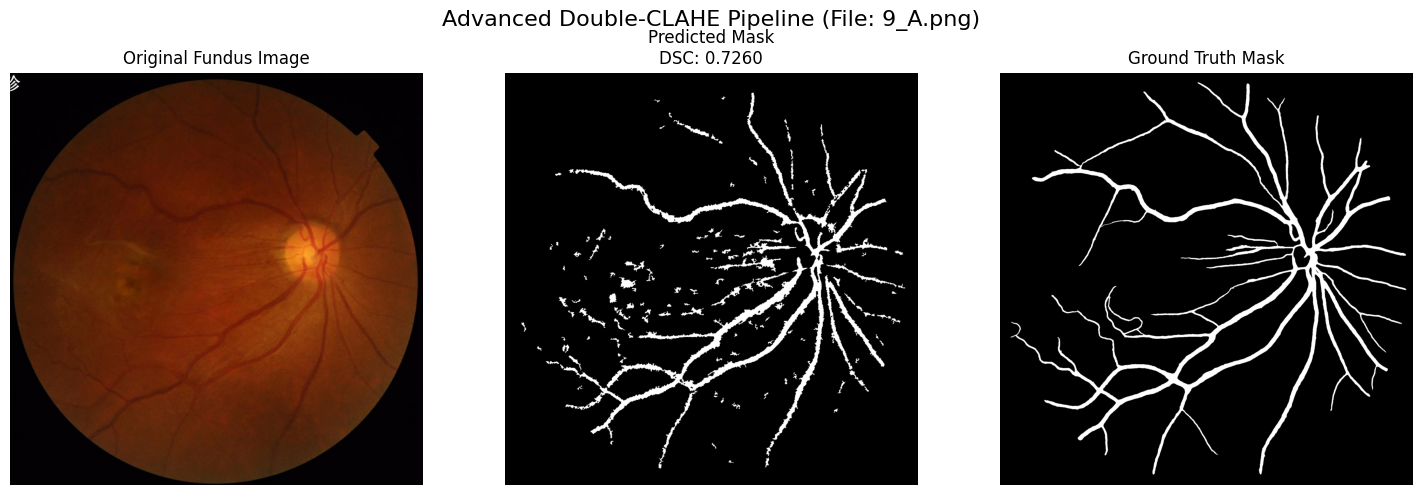

In [20]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

# --- 1. MOUNT DRIVE ---
drive.mount('/content/drive', force_remount=True)
project_path = '/content/drive/MyDrive/CV_Assessment_01'
if os.path.exists(project_path): os.chdir(project_path)

# ==========================================
# 1. THE ADAPTIVE "DOUBLE-CLAHE" PIPELINE
# ==========================================
def segment_blood_vessels(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if img is None: return None, None

    # Step 1: Standardized Resolution Mapping (Crucial for consistent math)
    original_shape = img.shape[:2] # Save original (height, width)
    img_resized = cv2.resize(img, (800, 800)) # Force 800x800

    # Step 2: Green Channel Extraction
    b, g, r = cv2.split(img_resized)

    # Step 3: FOV Masking
    _, fov_mask = cv2.threshold(g, 10, 255, cv2.THRESH_BINARY)
    kernel_erode = np.ones((15, 15), np.uint8)
    fov_mask_eroded = cv2.erode(fov_mask, kernel_erode, iterations=2)

    # Step 4: First CLAHE (Enhance original tissue)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    g_clahe = clahe.apply(g)

    # Step 5: Background Subtraction
    # Because size is locked to 800, a kernel of 45 perfectly erases all vessels uniformly
    background = cv2.medianBlur(g_clahe, 45)
    vessels_diff = cv2.subtract(background, g_clahe)

    # Step 6: DOUBLE-CLAHE (The Secret Weapon)
    # Applies CLAHE again to the extracted vessels to vastly boost faint capillaries
    clahe_diff = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    vessels_enhanced = clahe_diff.apply(vessels_diff)

    # Step 7: FOV-Restricted Statistical Thresholding
    # Calculate Mean and Std Dev ONLY inside the retina to find the perfect math cutoff
    valid_pixels = vessels_enhanced[fov_mask_eroded > 0]
    if len(valid_pixels) > 0:
        mean_val = np.mean(valid_pixels)
        std_val = np.std(valid_pixels)
        # Threshold = Mean + 1.2 standard deviations
        dynamic_thresh = mean_val + (1.2 * std_val)
    else:
        dynamic_thresh = 20 # Fallback

    _, binary_vessels = cv2.threshold(vessels_enhanced, dynamic_thresh, 255, cv2.THRESH_BINARY)

    # Apply FOV mask to erase outer ring
    vessels_masked = cv2.bitwise_and(binary_vessels, fov_mask_eroded)

    # Step 8: Morphological Closing & Component Analysis
    kernel_close = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    vessels_closed = cv2.morphologyEx(vessels_masked, cv2.MORPH_CLOSE, kernel_close)

    num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(vessels_closed, connectivity=8)
    final_mask_small = np.zeros_like(vessels_closed)

    for i in range(1, num_labels):
        if stats[i, cv2.CC_STAT_AREA] > 20:
            final_mask_small[labels == i] = 255

    # Step 9: Restore Original Resolution
    final_mask = cv2.resize(final_mask_small, (original_shape[1], original_shape[0]), interpolation=cv2.INTER_NEAREST)

    return img, final_mask

# ==========================================
# 2. VALIDATION METRICS
# ==========================================
def calculate_metrics(predicted_mask, ground_truth_mask):
    S = predicted_mask > 128
    G = ground_truth_mask > 128

    intersection = np.logical_and(S, G).sum()
    union = np.logical_or(S, G).sum()
    sum_S = S.sum()
    sum_G = G.sum()

    dice = (2.0 * intersection) / (sum_S + sum_G) if (sum_S + sum_G) != 0 else 0.0
    jaccard = intersection / union if union != 0 else 0.0
    return dice, jaccard

# ==========================================
# 3. BATCH VALIDATION SCRIPT
# ==========================================
base_path = 'Dataset/IPCV_ ASSIGNMENT_01_DATABASE/Database_For_Practical_Part/For Validation'
img_dir = os.path.join(base_path, 'Foundus Images For Validation')
gt_dir = os.path.join(base_path, 'Ground Truth For Validation')

if not os.path.exists(img_dir) or not os.path.exists(gt_dir):
    print("Error: Could not find validation folders. Check your paths!")
else:
    img_files = sorted([f for f in os.listdir(img_dir) if f.endswith(('.jpg', '.png', '.tif'))])
    gt_files = sorted([f for f in os.listdir(gt_dir) if f.endswith(('.jpg', '.png', '.tif'))])

    print(f"Found {len(img_files)} images. Running Advanced Double-CLAHE Pipeline...\n")
    all_dice_scores = []
    all_jaccard_scores = []

    for i, (img_name, gt_name) in enumerate(zip(img_files, gt_files)):
        img_path = os.path.join(img_dir, img_name)
        gt_path = os.path.join(gt_dir, gt_name)

        _, pred_mask = segment_blood_vessels(img_path)
        gt_mask = cv2.imread(gt_path, cv2.IMREAD_GRAYSCALE)

        if pred_mask is not None and gt_mask is not None:
            if pred_mask.shape != gt_mask.shape:
                pred_mask = cv2.resize(pred_mask, (gt_mask.shape[1], gt_mask.shape[0]), interpolation=cv2.INTER_NEAREST)

            dice, jaccard = calculate_metrics(pred_mask, gt_mask)
            all_dice_scores.append(dice)
            all_jaccard_scores.append(jaccard)

            if (i + 1) % 10 == 0:
                print(f"Processed {i + 1}/100 images... Current Avg DSC: {np.mean(all_dice_scores):.4f}")

    avg_dice = np.mean(all_dice_scores)
    avg_jaccard = np.mean(all_jaccard_scores)

    print("\n==============================")
    print("   FINAL VALIDATION RESULTS   ")
    print("==============================")
    print(f"Total Images Processed: {len(all_dice_scores)}")
    print(f"Average Dice Similarity Coefficient (DSC): {avg_dice:.4f}")
    print(f"Average Jaccard Index (IoU): {avg_jaccard:.4f}")
    print("==============================\n")

    # Show Visual Output
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    fig.suptitle(f"Advanced Double-CLAHE Pipeline (File: {img_files[-1]})", fontsize=16)

    axes[0].imshow(cv2.cvtColor(cv2.imread(os.path.join(img_dir, img_files[-1])), cv2.COLOR_BGR2RGB))
    axes[0].set_title("Original Fundus Image")
    axes[0].axis('off')

    axes[1].imshow(pred_mask, cmap='gray')
    axes[1].set_title(f"Predicted Mask\nDSC: {all_dice_scores[-1]:.4f}")
    axes[1].axis('off')

    axes[2].imshow(gt_mask, cmap='gray')
    axes[2].set_title("Ground Truth Mask")
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()